In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
def eigen_decompose(A,n):

    x = np.ones(A.shape[0])

    e_vals = []
    e_vecs = []
    for i in range(n):
        l = 1
        iter = 100
        for j in range(iter):
            x = A@x / np.linalg.norm(A@x)
            #print(x)
            l = (A@x)@x

        #print(l)
        #print(str(i)+" th dominant eigmap found")

        e_vals.append(np.round(l,decimals = 3))
        x1 = np.array([np.round(i,decimals = 3) for i in x])
        e_vecs.append(x1)

        ev = np.copy(x).reshape((A.shape[0],1))

        A = A - e_vals[i]*(ev @ ev.T)

        x = np.ones(A.shape[0])
    
    
    return e_vals,e_vecs



def SVD(x):
    U = np.zeros((x.shape[0],x.shape[0]))
    S = np.zeros((x.shape[0],x.shape[1]))
    V = np.zeros((x.shape[1],x.shape[1]))
    
    x_xt = x@x.T
    xt_x = x.T@x
    e_vals_x,e_vecs_x = eigen_decompose(x_xt,x.shape[0])

    e_vals_xt,e_vecs_xt = eigen_decompose(xt_x,x.shape[1])

    for i in range(min(x.shape)):
        S[i,i] = e_vals_x[i]**0.5
    
    for i in range(len(e_vals_x)):
        U[:,i] = e_vecs_x[i]
    
    for i in range(len(e_vals_xt)):
        V[i,:] = e_vecs_xt[i]
    
    return U,S,V






def reconstruct(U,S,V,k):
    A_hat = U[:,:k] @ S[:k,:k] @ V.T[:k,]

    return A_hat




def FrobeniusNorm(A):
    
    ans = 0
    
    for x in A:
        for y in x:
            ans += y**2
    
    return ans ** 0.5


In [2]:
df = pd.read_csv("train.csv")

df.head()

NameError: name 'pd' is not defined

In [3]:
X = df.values[:1000,2:]
k = 256
U_X,S_X,V_X = SVD(X)

NameError: name 'df' is not defined

In [9]:
error_l = []
for i in range(1,k+1,5):
    X_hat = reconstruct(U_X,S_X,V_X,i)
    error_l.append(FrobeniusNorm(X_hat-X))

Text(0.5, 1.0, 'reconstruction error vs k')

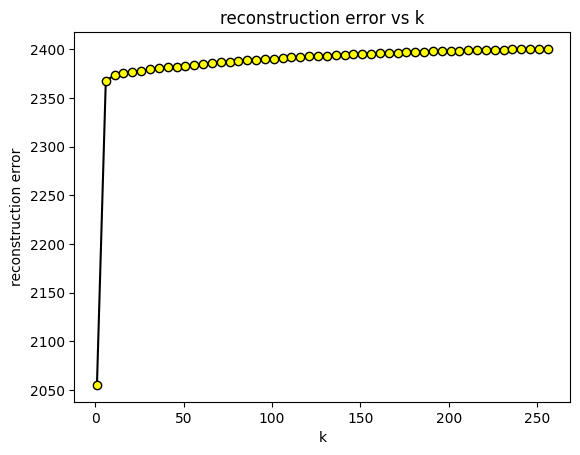

In [10]:
plt.plot([x for x in range(1,k+1,5)],error_l,marker = 'o', markerfacecolor = 'yellow', color = 'black')
plt.xlabel("k")
plt.ylabel("reconstruction error")
plt.title("reconstruction error vs k")